In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('/home/kushal/kushal/Machine-Learning-Projects-master/RELIANCE - NSE Stock Data/RILO - Copy.csv')

In [3]:
data.head()

Symbol Series      Date  Prev Close  Open Price  High Price  Low Price  \
0  RELIANCE     EQ  1-Jan-16     1014.60     1009.80      1018.9    1008.20   
1  RELIANCE     EQ  4-Jan-16     1015.35     1005.00      1013.8     986.70   
2  RELIANCE     EQ  5-Jan-16      995.30     1000.30      1010.0     997.00   
3  RELIANCE     EQ  6-Jan-16     1005.15     1007.60      1038.4    1000.40   
4  RELIANCE     EQ  7-Jan-16     1032.20     1021.05      1028.0    1008.05   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1013.6      1015.35        1015.52                1238135   
1       993.2       995.30         998.91                6896571   
2      1005.0      1005.15        1003.41                3416459   
3      1029.1      1032.20        1028.15                6116855   
4      1018.9      1013.25        1016.73                4512219   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  1.257353e+09          30701           529539                   42.77  
1  6.889070e+09          66235          4974602                   72.13  
2  3.428125e+09          59935          1987804                   58.18  
3  6.289073e+09         160947          2912662                   47.62  
4  4.587700e+09         105075          2474491                   54.84

In [4]:
data.shape

(1324, 15)

In [5]:
data.size

19860

In [6]:
data["day"] = pd.to_datetime(data["Date"], format="%d-%b-%y").dt.day

In [7]:
data["month"] = pd.to_datetime(data["Date"], format = "%d-%b-%y").dt.month

In [8]:
data["year"] = pd.to_datetime(data["Date"], format = "%d-%b-%y").dt.year

In [9]:
data.head()

Symbol Series      Date  Prev Close  Open Price  High Price  Low Price  \
0  RELIANCE     EQ  1-Jan-16     1014.60     1009.80      1018.9    1008.20   
1  RELIANCE     EQ  4-Jan-16     1015.35     1005.00      1013.8     986.70   
2  RELIANCE     EQ  5-Jan-16      995.30     1000.30      1010.0     997.00   
3  RELIANCE     EQ  6-Jan-16     1005.15     1007.60      1038.4    1000.40   
4  RELIANCE     EQ  7-Jan-16     1032.20     1021.05      1028.0    1008.05   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1013.6      1015.35        1015.52                1238135   
1       993.2       995.30         998.91                6896571   
2      1005.0      1005.15        1003.41                3416459   
3      1029.1      1032.20        1028.15                6116855   
4      1018.9      1013.25        1016.73                4512219   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  day  \
0  1.257353e+09          30701           529539                   42.77    1   
1  6.889070e+09          66235          4974602                   72.13    4   
2  3.428125e+09          59935          1987804                   58.18    5   
3  6.289073e+09         160947          2912662                   47.62    6   
4  4.587700e+09         105075          2474491                   54.84    7   

   month  year  
0      1  2016  
1      1  2016  
2      1  2016  
3      1  2016  
4      1  2016

In [10]:
data.shape

(1324, 18)

In [11]:
data.size

23832

In [12]:
data.describe()

Prev Close   Open Price   High Price    Low Price   Last Price  \
count  1324.000000  1324.000000  1324.000000  1324.000000  1324.000000   
mean   1311.043807  1313.436254  1328.644864  1297.260876  1312.213935   
std     377.738596   379.462103   384.037322   372.970908   378.085826   
min     780.900000   791.750000   793.400000   779.100000   781.200000   
25%    1012.837500  1014.000000  1023.725000  1003.425000  1012.862500   
50%    1230.075000  1231.750000  1244.300000  1214.175000  1230.900000   
75%    1486.362500  1481.000000  1506.837500  1464.287500  1487.625000   
max    2324.550000  2325.000000  2369.350000  2310.550000  2324.900000   

       Close Price  Average Price  Total Traded Quantity      Turnover  \
count  1324.000000    1324.000000           1.324000e+03  1.324000e+03   
mean   1312.119864    1313.226805           8.873225e+06  1.283806e+10   
std     377.840674     378.449456           7.489692e+06  1.380620e+10   
min     780.900000     785.510000           3.621700e+05  3.812024e+08   
25%    1013.037500    1013.945000           4.159562e+06  4.447683e+09   
50%    1231.275000    1228.885000           6.862827e+06  8.394594e+09   
75%    1488.487500    1486.270000           1.081276e+07  1.602505e+10   
max    2324.550000    2339.460000           6.523089e+07  1.473430e+11   

       No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty          day  \
count   1.324000e+03     1.324000e+03             1324.000000  1324.000000   
mean    1.959810e+05     3.583648e+06               45.719252    15.735650   
std     1.572366e+05     2.424792e+06               13.352733     8.804996   
min     1.000000e+00     1.252240e+05               11.480000     1.000000   
25%     9.206475e+04     2.038083e+06               36.517500     8.000000   
50%     1.525885e+05     2.946626e+06               45.760000    16.000000   
75%     2.373675e+05     4.393399e+06               55.210000    23.000000   
max     1.428490e+06     1.919505e+07              100.000000    31.000000   

             month         year  
count  1324.000000  1324.000000  
mean      6.255287  2018.195619  
std       3.490806     1.554341  
min       1.000000  2016.000000  
25%       3.000000  2017.000000  
50%       6.000000  2018.000000  
75%       9.000000  2020.000000  
max      12.000000  2021.000000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1324 non-null   object 
 1   Series                  1324 non-null   object 
 2   Date                    1324 non-null   object 
 3   Prev Close              1324 non-null   float64
 4   Open Price              1324 non-null   float64
 5   High Price              1324 non-null   float64
 6   Low Price               1324 non-null   float64
 7   Last Price              1324 non-null   float64
 8   Close Price             1324 non-null   float64
 9   Average Price           1324 non-null   float64
 10  Total Traded Quantity   1324 non-null   int64  
 11  Turnover                1324 non-null   float64
 12  No. of Trades           1324 non-null   int64  
 13  Deliverable Qty         1324 non-null   int64  
 14  % Dly Qt to Traded Qty  1324 non-null   

In [14]:
data.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
day                       0
month                     0
year                      0
dtype: int64

In [15]:
data['Symbol'].value_counts()

RELIANCE    1324
Name: Symbol, dtype: int64

In [16]:
data['Series'].value_counts()

EQ    1322
BL       2
Name: Series, dtype: int64

In [17]:
data['Prev Close'].value_counts()

934.25     2
1280.50    2
1027.20    2
1964.05    2
1327.35    2
          ..
1985.60    1
1560.05    1
1289.50    1
1323.75    1
1016.00    1
Name: Prev Close, Length: 1282, dtype: int64

In [18]:
data['Open Price'].value_counts()

950.00     6
2085.00    5
1006.00    4
1050.00    4
1375.00    4
          ..
2325.00    1
1075.20    1
1892.25    1
1020.50    1
1998.45    1
Name: Open Price, Length: 1161, dtype: int64

In [19]:
data['High Price'].value_counts()

1000.00    5
1550.00    4
1281.00    3
1360.00    3
982.00     3
          ..
1352.95    1
2028.50    1
1027.05    1
1028.95    1
1329.75    1
Name: High Price, Length: 1222, dtype: int64

In [20]:
data['Low Price'].value_counts()

1325.00    4
935.00     4
1047.00    4
1022.00    3
1280.00    3
          ..
941.50     1
1186.05    1
912.55     1
1271.00    1
990.00     1
Name: Low Price, Length: 1213, dtype: int64

In [21]:
data['Last Price'].value_counts()

1330.00    4
1090.00    3
1288.00    3
993.00     3
1089.00    3
          ..
1357.00    1
1320.50    1
1087.00    1
1297.75    1
1036.00    1
Name: Last Price, Length: 1212, dtype: int64

In [22]:
data['Close Price'].value_counts()

921.00     2
1014.90    2
1911.15    2
920.40     2
1391.85    2
          ..
1560.05    1
1289.50    1
1323.75    1
1168.50    1
1016.00    1
Name: Close Price, Length: 1281, dtype: int64

In [23]:
data['Average Price'].value_counts()

1228.49    2
1024.42    2
1246.51    2
1022.77    2
1379.51    2
          ..
1312.08    1
949.05     1
917.67     1
1995.09    1
1024.00    1
Name: Average Price, Length: 1315, dtype: int64

In [24]:
data['Total Traded Quantity'].value_counts()

5738495     1
2153091     1
3490441     1
3885064     1
13810054    1
           ..
11031889    1
3376466     1
13872467    1
8643924     1
1982466     1
Name: Total Traded Quantity, Length: 1324, dtype: int64

In [25]:
data['Turnover'].value_counts()

8.912049e+10    1
2.899011e+10    1
5.491574e+09    1
5.558697e+09    1
3.844708e+09    1
               ..
2.538891e+09    1
2.706669e+09    1
1.759815e+10    1
7.306439e+09    1
1.003280e+10    1
Name: Turnover, Length: 1324, dtype: int64

In [26]:
data['No. of Trades'].value_counts()

116207    2
169662    2
192511    1
78535     1
164538    1
         ..
556669    1
213461    1
118992    1
213153    1
296960    1
Name: No. of Trades, Length: 1322, dtype: int64

In [27]:
data['Deliverable Qty'].value_counts()

2062636    1
4006564    1
2886310    1
5616490    1
5252804    1
          ..
1293631    1
5760321    1
1936607    1
3491139    1
2124452    1
Name: Deliverable Qty, Length: 1324, dtype: int64

In [28]:
data['% Dly Qt to Traded Qty'].value_counts()

40.80    3
49.91    3
38.73    3
44.37    3
47.95    3
        ..
40.36    1
54.62    1
15.40    1
36.23    1
53.75    1
Name: % Dly Qt to Traded Qty, Length: 1156, dtype: int64

In [29]:
data['day'].value_counts()

27    48
22    47
5     46
3     45
4     45
6     45
8     45
9     45
19    45
18    45
16    44
12    44
7     44
11    44
1     44
20    44
23    44
28    44
17    43
15    42
13    42
24    42
26    42
14    41
10    41
21    41
30    40
29    40
25    39
2     37
31    26
Name: day, dtype: int64

In [30]:
data['month'].value_counts()

1     129
3     124
2     119
4     113
5     111
7     109
12    105
8     105
6     105
11    103
10    101
9     100
Name: month, dtype: int64

In [31]:
data['year'].value_counts()

2020    252
2017    249
2016    247
2019    246
2018    246
2021     84
Name: year, dtype: int64

In [32]:
corr = data.corr()
corr['% Dly Qt to Traded Qty'].sort_values(ascending = False)

% Dly Qt to Traded Qty    1.000000
day                       0.047104
Deliverable Qty          -0.079172
month                    -0.107437
Total Traded Quantity    -0.471111
No. of Trades            -0.505683
Turnover                 -0.531407
Low Price                -0.539679
Open Price               -0.543069
Prev Close               -0.544230
Average Price            -0.547523
Close Price              -0.548409
Last Price               -0.548678
High Price               -0.552000
year                     -0.582378
Name: % Dly Qt to Traded Qty, dtype: float64

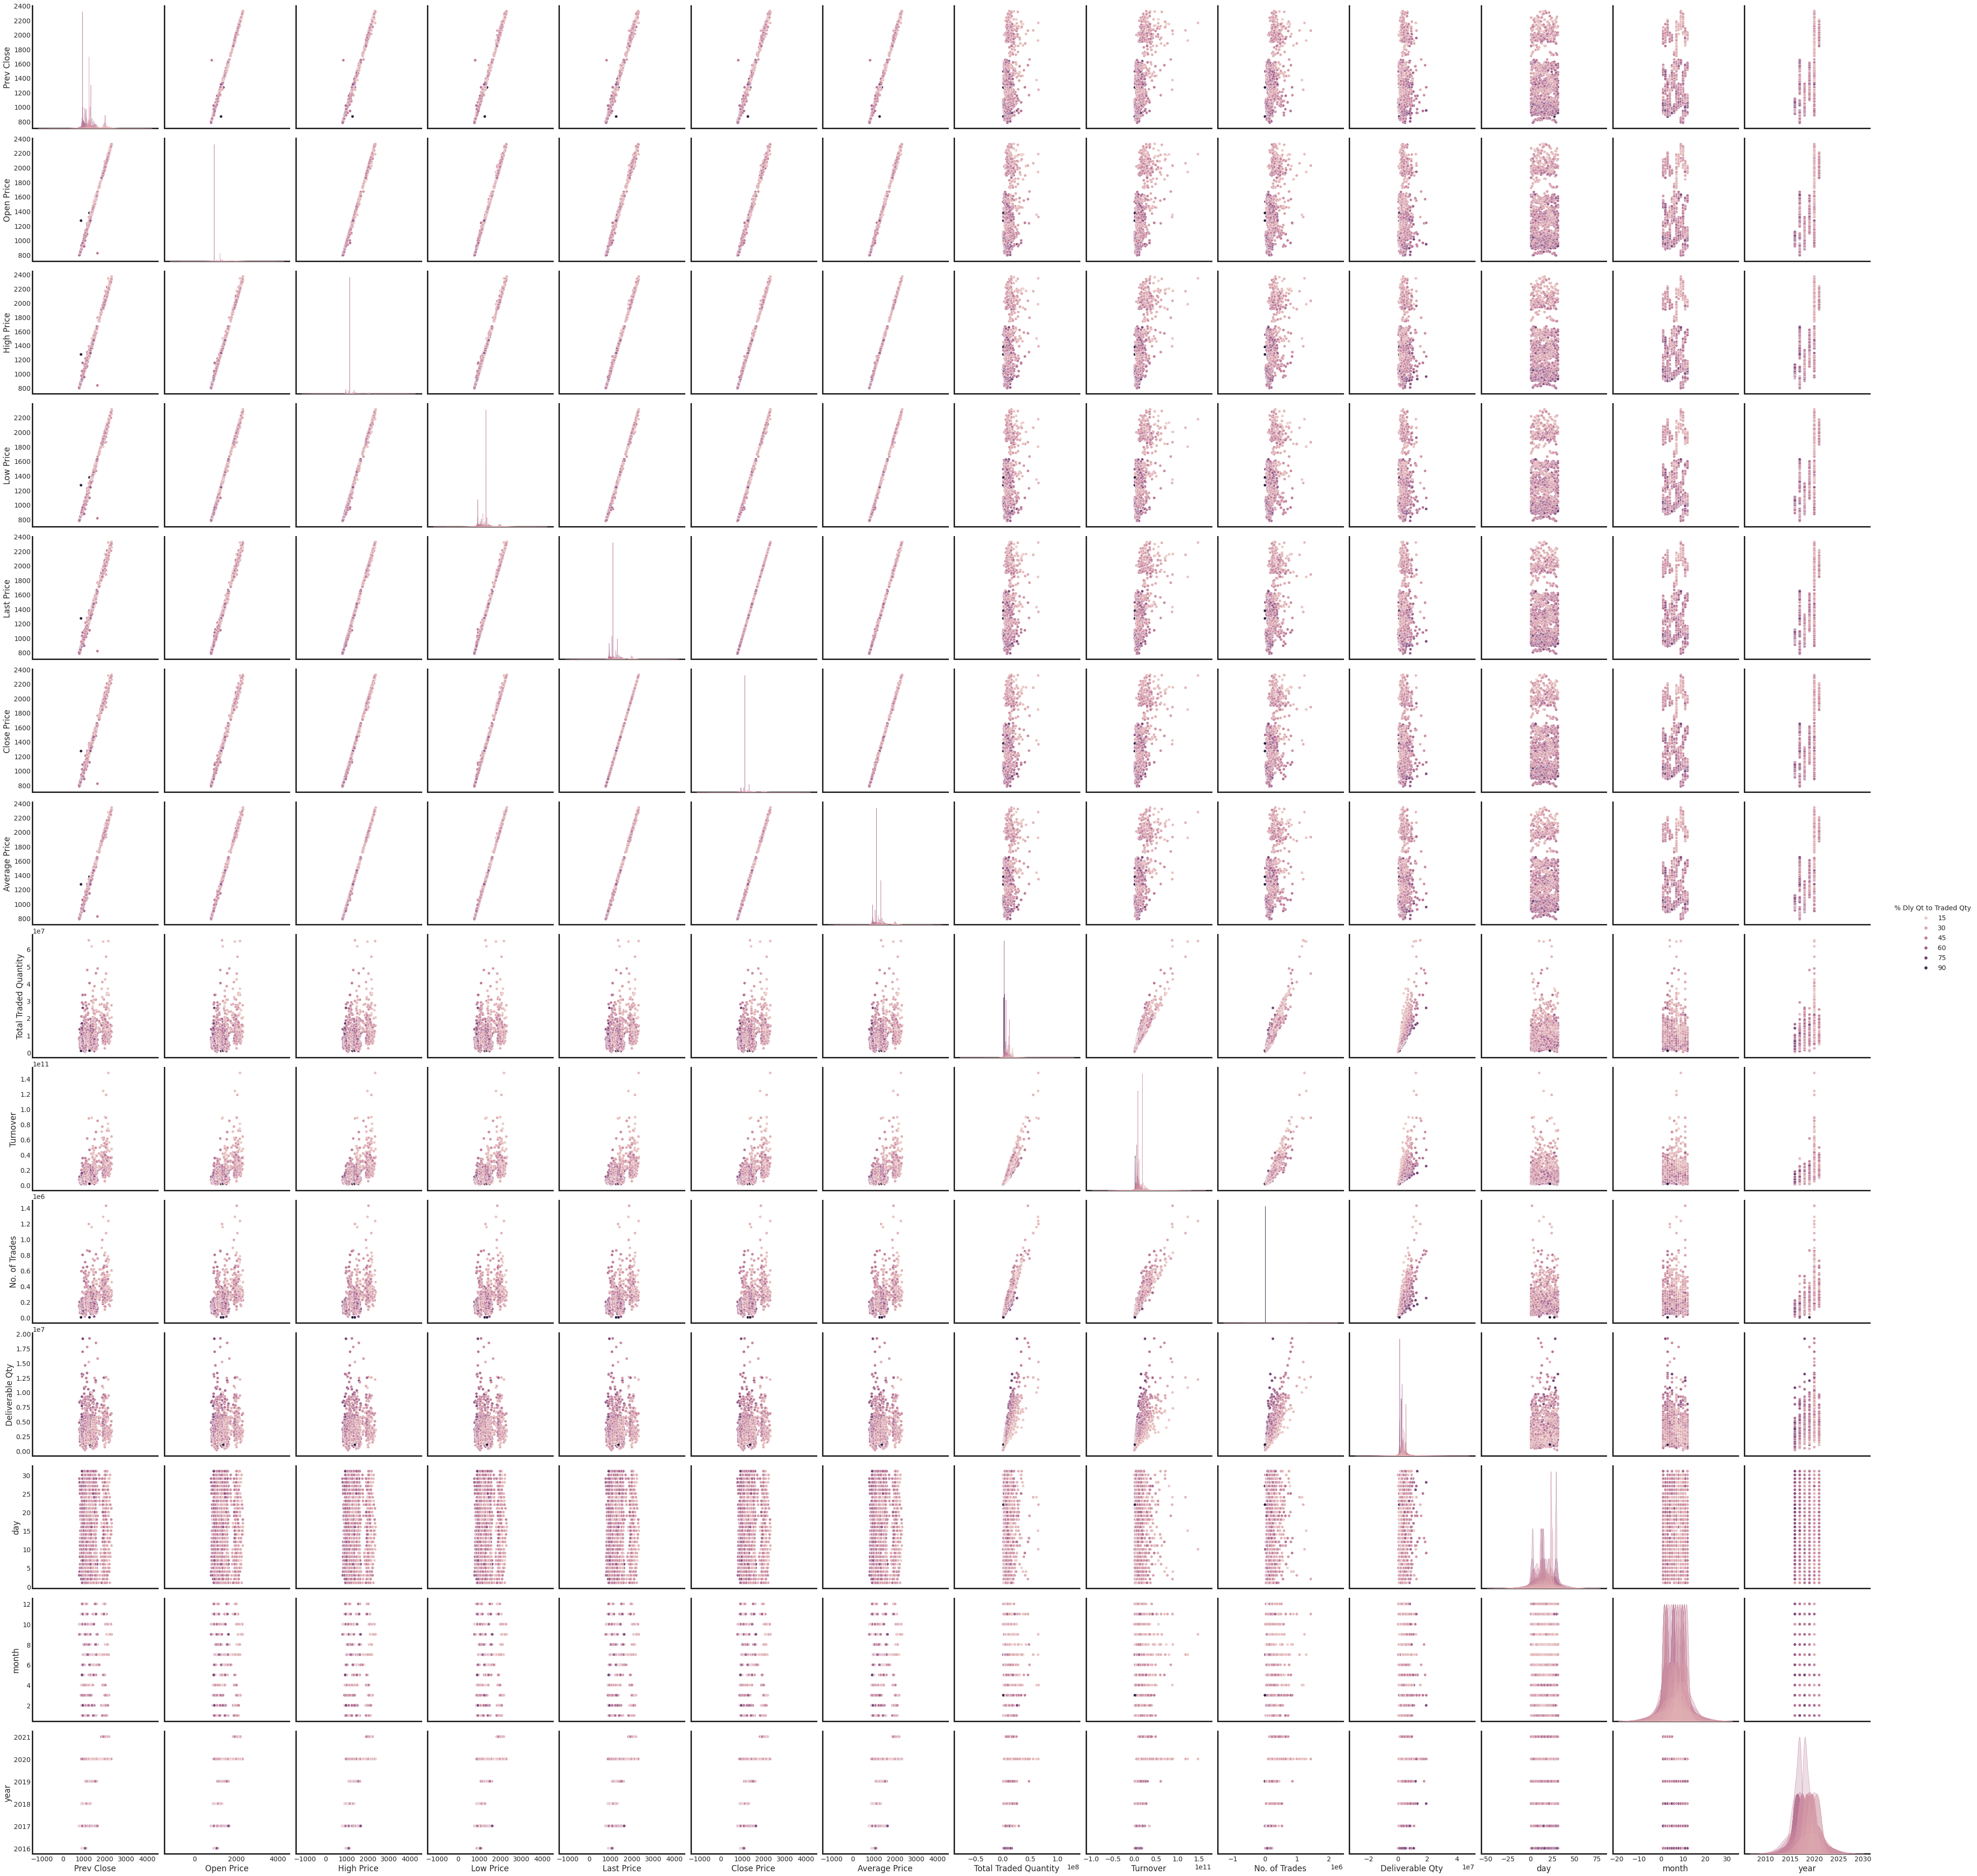

In [33]:
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data,hue='% Dly Qt to Traded Qty',size= 4)

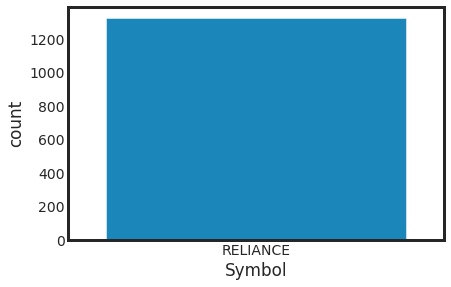

In [34]:
sns.countplot(data['Symbol'])
plt.show()

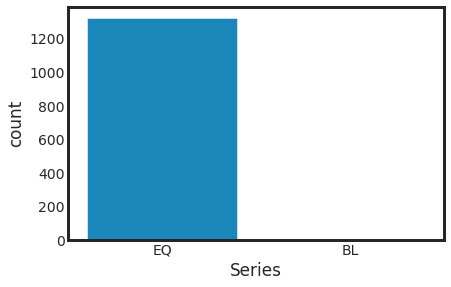

In [35]:
sns.countplot(data['Series'])
plt.show()

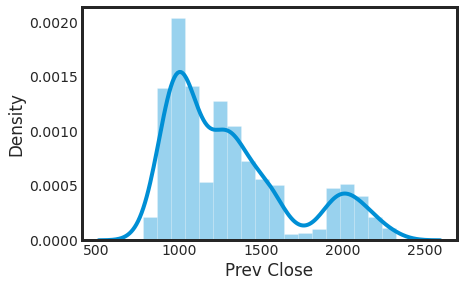

In [36]:
sns.distplot(data['Prev Close'])
plt.show()

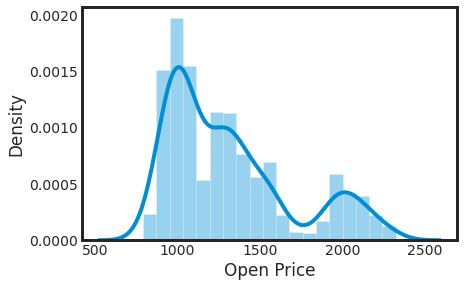

In [37]:
sns.distplot(data['Open Price'])
plt.show()

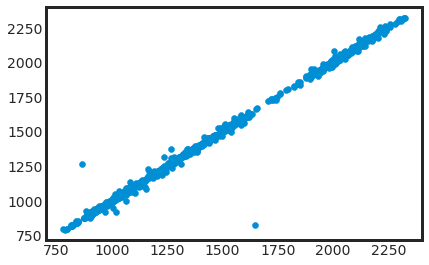

In [38]:
plt.scatter(data['Prev Close'],data['Open Price'])

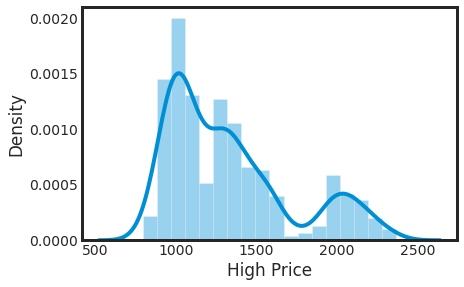

In [39]:
sns.distplot(data['High Price'])
plt.show()

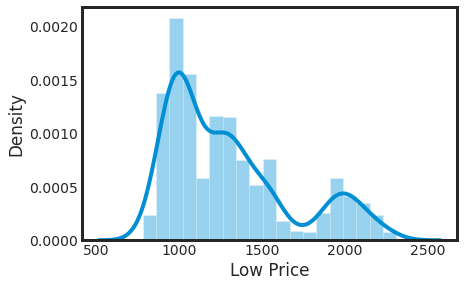

In [40]:
sns.distplot(data['Low Price'])
plt.show()

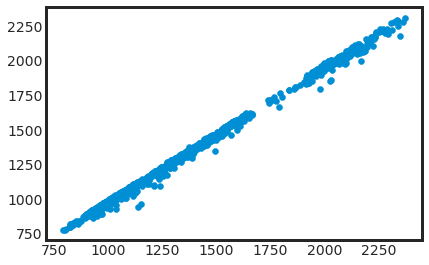

In [41]:
plt.scatter(data['High Price'],data['Low Price'])

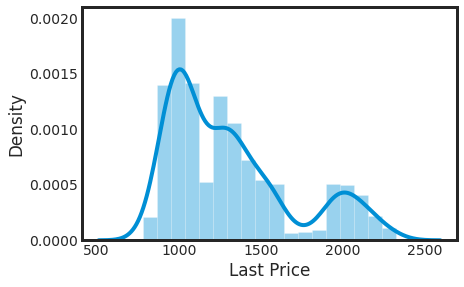

In [42]:
sns.distplot(data['Last Price'])
plt.show()

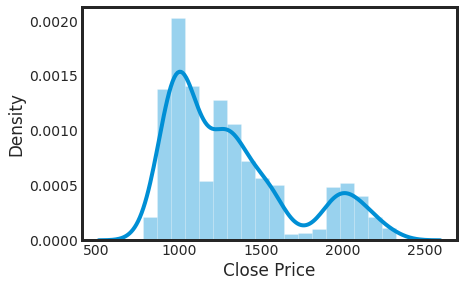

In [43]:
sns.distplot(data['Close Price'])
plt.show()

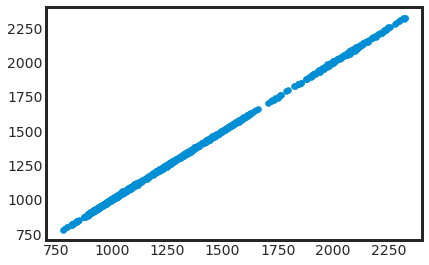

In [44]:
plt.scatter(data['Last Price'],data['Close Price'])

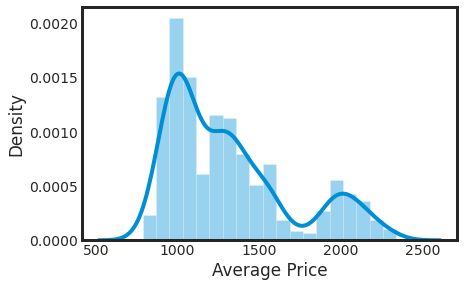

In [45]:
sns.distplot(data['Average Price'])
plt.show()

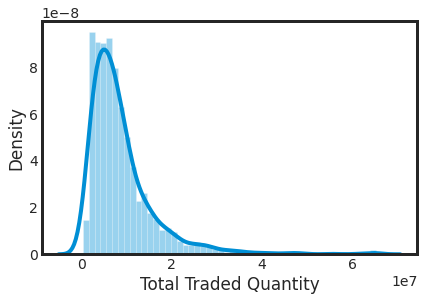

In [46]:
sns.distplot(data['Total Traded Quantity'])
plt.show()

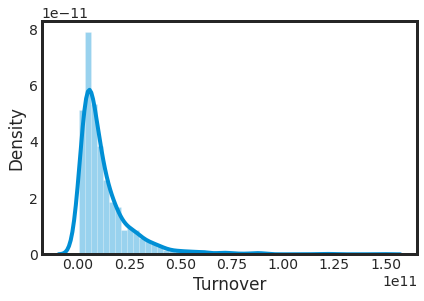

In [47]:
sns.distplot(data['Turnover'])
plt.show()

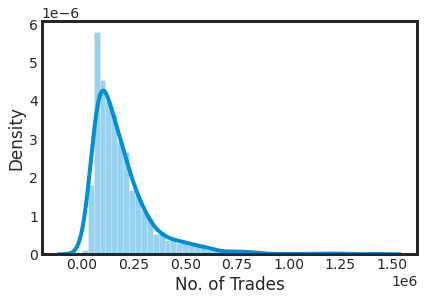

In [48]:
sns.distplot(data['No. of Trades'])
plt.show()

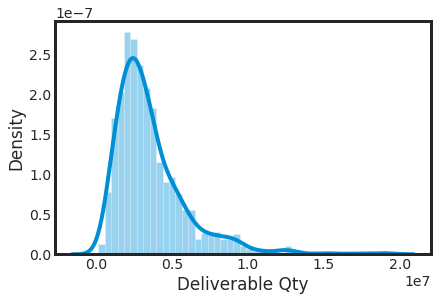

In [49]:
sns.distplot(data['Deliverable Qty'])
plt.show()

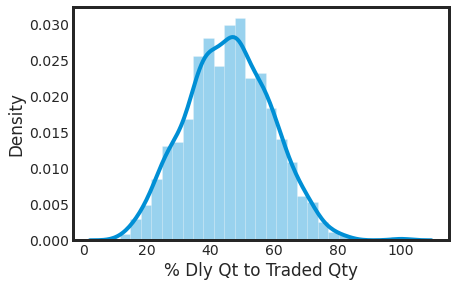

In [50]:
sns.distplot(data['% Dly Qt to Traded Qty'])
plt.show()

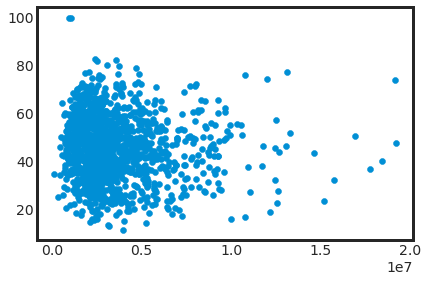

In [51]:
plt.scatter(data['Deliverable Qty'],data['% Dly Qt to Traded Qty'])

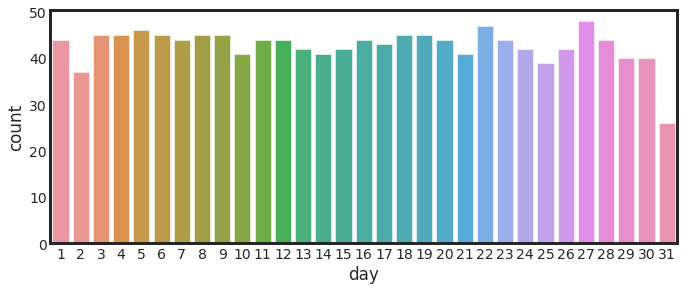

In [52]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['day'])
plt.show()

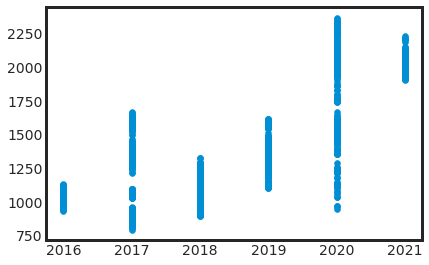

In [53]:
plt.scatter(data['year'],data['High Price'])

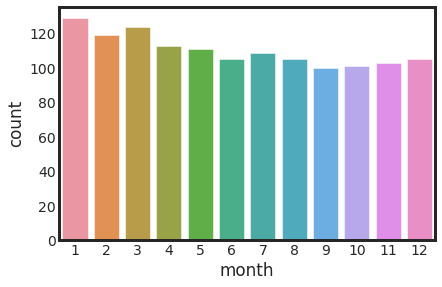

In [54]:
sns.countplot(data['month'])
plt.show()

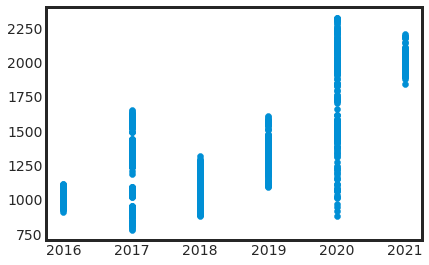

In [55]:
plt.scatter(data['year'],data['Close Price'])

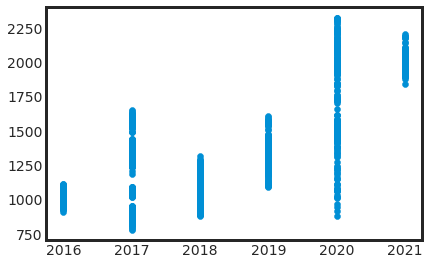

In [56]:
plt.scatter(data['year'],data['Prev Close'])

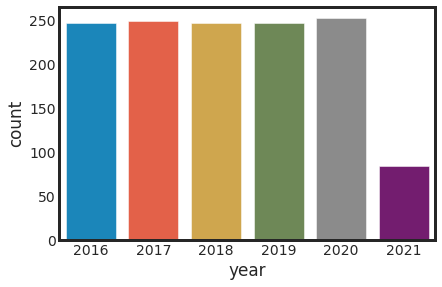

In [57]:
sns.countplot(data['year'])
plt.show()

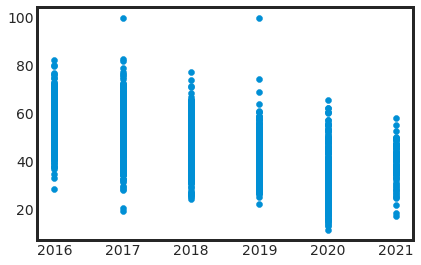

In [58]:
plt.scatter(data['year'],data['% Dly Qt to Traded Qty'])

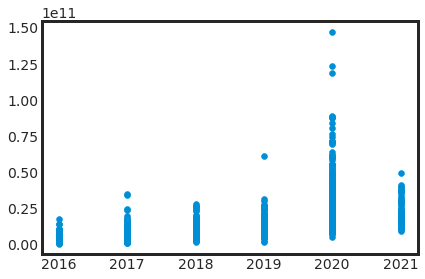

In [59]:
plt.scatter(data['year'],data['Turnover'])

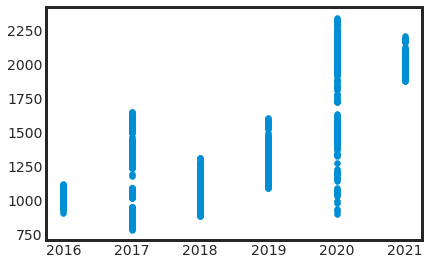

In [60]:
plt.scatter(data['year'],data['Average Price'])

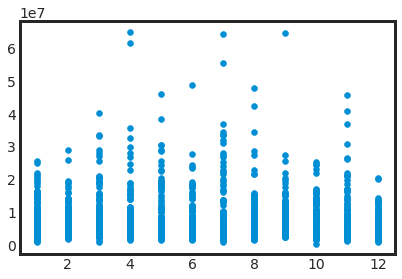

In [61]:
plt.scatter(data['month'],data['Total Traded Quantity'])

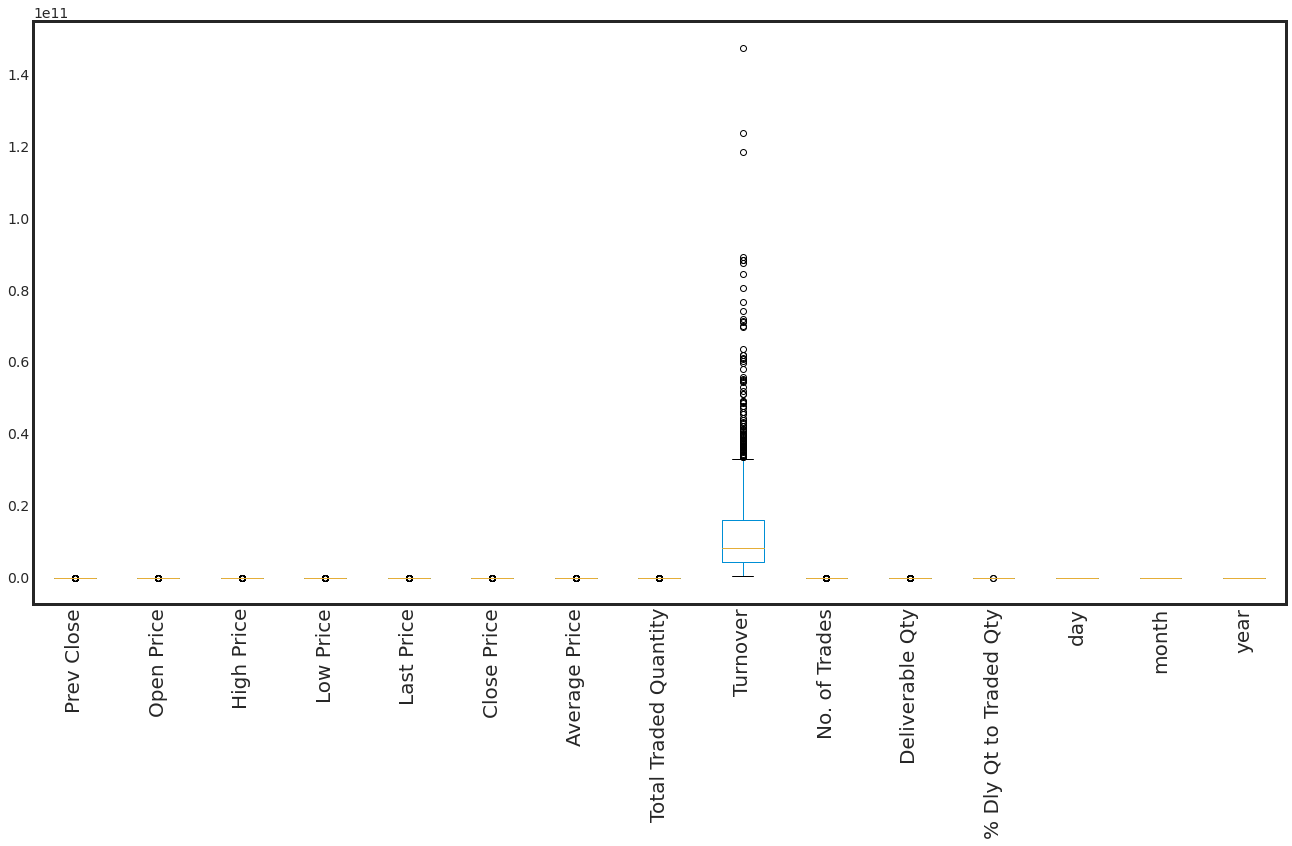

In [62]:
data.plot(kind='box',figsize=(20,10))
plt.xticks(rotation =90,fontsize =20)
plt.show()

<AxesSubplot:>

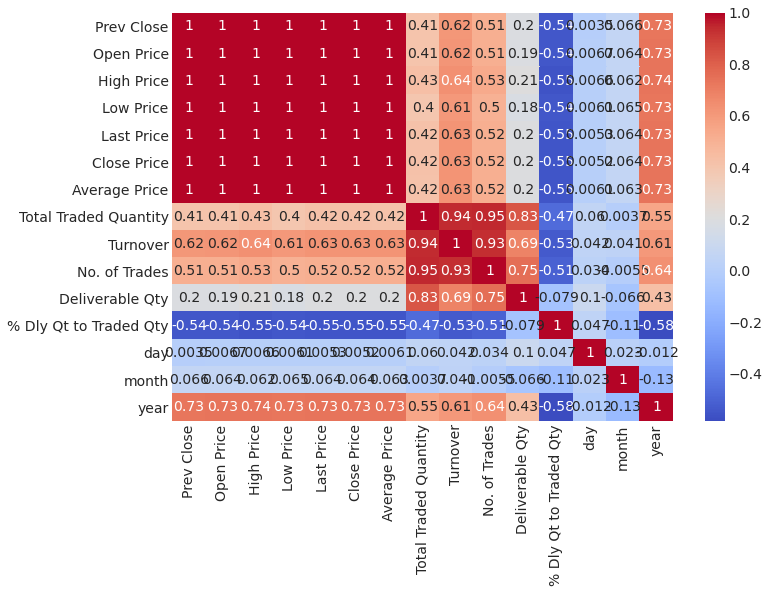

In [63]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [64]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for x in data:
    if data[x].dtypes =='object':
        data[x] = le.fit_transform(data[x])

In [65]:
data.head()

Symbol  Series  Date  Prev Close  Open Price  High Price  Low Price  \
0       0       1    17     1014.60     1009.80      1018.9    1008.20   
1       0       1  1066     1015.35     1005.00      1013.8     986.70   
2       0       1  1114      995.30     1000.30      1010.0     997.00   
3       0       1  1158     1005.15     1007.60      1038.4    1000.40   
4       0       1  1204     1032.20     1021.05      1028.0    1008.05   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1013.6      1015.35        1015.52                1238135   
1       993.2       995.30         998.91                6896571   
2      1005.0      1005.15        1003.41                3416459   
3      1029.1      1032.20        1028.15                6116855   
4      1018.9      1013.25        1016.73                4512219   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  day  \
0  1.257353e+09          30701           529539                   42.77    1   
1  6.889070e+09          66235          4974602                   72.13    4   
2  3.428125e+09          59935          1987804                   58.18    5   
3  6.289073e+09         160947          2912662                   47.62    6   
4  4.587700e+09         105075          2474491                   54.84    7   

   month  year  
0      1  2016  
1      1  2016  
2      1  2016  
3      1  2016  
4      1  2016

In [66]:
x = data.drop(columns = ['% Dly Qt to Traded Qty'],axis=1)
y = data['% Dly Qt to Traded Qty']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 13)

In [68]:
x_train.shape

(926, 17)

In [69]:
x_test.shape

(398, 17)

In [70]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.7569948223520148

In [71]:
y_test

681     37.32
723     40.58
474     55.24
1155    27.81
955     39.91
        ...  
275     82.70
1264    38.15
489     58.57
297     59.91
388     40.16
Name: % Dly Qt to Traded Qty, Length: 398, dtype: float64

In [72]:
y_predict

array([ 38.49950627,  43.50747459,  52.02638964,  28.91677999,
        37.50999485,  47.37116009,  10.7122853 ,  65.07508856,
        24.91207252,  53.3670756 ,  42.03974979,  35.84891263,
        37.01199425,  28.05756516,  45.69694004,  53.93176377,
        51.12494641,  48.07794095,  56.20060156,  33.14162189,
        28.18604083,  54.23186765,  56.49759648,  52.02535904,
        39.96549993,  42.64860609,  39.72992235,  42.59697074,
        42.83375046,  58.09595435,  53.42190098,  33.63065601,
        57.34421524,  25.94032538,  48.67743139,  51.72019727,
        34.24011036,  36.95369892,  47.25711765,  58.90634763,
        59.51328873,  56.68581677,  51.03832295,  57.12135052,
        45.01484086,  50.04198426,  45.45925581,  25.03932697,
        37.74512069,  39.20463142,  39.64000195,  30.86352967,
        60.93271066,  33.94668388,  31.79085475,  49.70975301,
        35.04466173,  45.12631522,  44.78182378,  41.68539563,
        41.15536838,  62.07371615, 112.921627  ,  53.65

In [73]:
pd.crosstab(y_test,y_predict)

col_0                   -23.402201    2.941732     7.232514     10.168143   \
% Dly Qt to Traded Qty                                                       
11.48                             0            1            0            0   
12.91                             0            0            0            0   
15.08                             0            0            1            0   
16.74                             1            0            0            0   
17.60                             0            0            0            0   
...                             ...          ...          ...          ...   
74.43                             0            0            0            0   
76.87                             0            0            0            0   
80.24                             0            0            0            0   
82.70                             0            0            0            0   
100.00                            0            0            0            0   

col_0                    10.712285    19.069688    19.925933    20.500469   \
% Dly Qt to Traded Qty                                                       
11.48                             0            0            0            0   
12.91                             1            0            0            0   
15.08                             0            0            0            0   
16.74                             0            0            0            0   
17.60                             0            1            0            0   
...                             ...          ...          ...          ...   
74.43                             0            0            0            0   
76.87                             0            0            0            0   
80.24                             0            0            0            0   
82.70                             0            0            0            0   
100.00                            0            0            0            0   

col_0                    22.102071    22.665730   ...   61.593813   \
% Dly Qt to Traded Qty                            ...                
11.48                             0            0  ...            0   
12.91                             0            0  ...            0   
15.08                             0            0  ...            0   
16.74                             0            0  ...            0   
17.60                             0            0  ...            0   
...                             ...          ...  ...          ...   
74.43                             0            0  ...            0   
76.87                             0            0  ...            0   
80.24                             0            0  ...            0   
82.70                             0            0  ...            0   
100.00                            0            0  ...            0   

col_0                    61.887796    62.073716    62.483511    62.535405   \
% Dly Qt to Traded Qty                                                       
11.48                             0            0            0            0   
12.91                             0            0            0            0   
15.08                             0            0            0            0   
16.74                             0            0            0            0   
17.60                             0            0            0            0   
...                             ...          ...          ...          ...   
74.43                             0            0            0            0   
76.87                             0            0            0            0   
80.24                             0            0            0            0   
82.70                             0            0            0            0   
100.00                            0            0            0            0   

col_0                    65.075089    66.718

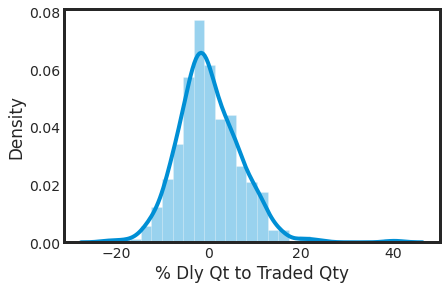

In [74]:
sns.distplot(y_test-y_predict)
plt.show()

In [75]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.6753490759113201

In [76]:
y_test

681     37.32
723     40.58
474     55.24
1155    27.81
955     39.91
        ...  
275     82.70
1264    38.15
489     58.57
297     59.91
388     40.16
Name: % Dly Qt to Traded Qty, Length: 398, dtype: float64

In [77]:
y_predict

array([25.95, 36.63, 58.16, 29.73, 43.01, 56.05, 18.9 , 55.14, 14.79,
       55.25, 44.15, 42.95, 55.77, 34.92, 41.61, 57.68, 45.93, 43.54,
       61.15, 43.31, 26.85, 50.89, 58.7 , 47.38, 38.98, 56.53, 53.16,
       44.15, 43.12, 58.16, 76.64, 30.1 , 58.8 , 25.41, 47.51, 32.71,
       44.28, 43.43, 60.71, 67.22, 54.61, 59.65, 50.57, 64.76, 26.76,
       51.95, 46.12, 26.2 , 73.94, 40.54, 34.94, 23.25, 51.  , 33.09,
       27.89, 65.77, 39.47, 34.66, 43.12, 40.04, 25.95, 71.48, 49.32,
       57.02, 54.63, 50.32, 66.42, 69.16, 57.17, 76.2 , 61.96, 39.47,
       67.07, 15.85, 47.95, 45.35, 18.9 , 40.54, 34.56, 47.95, 39.47,
       39.04, 46.14, 53.72, 44.93, 47.97, 37.66, 56.19, 19.14, 46.12,
       61.34, 25.89, 48.46, 47.18, 51.49, 66.89, 49.91, 50.57, 54.91,
       66.48, 48.58, 46.8 , 27.03, 41.81, 51.09, 48.52, 49.01, 53.75,
       23.99, 61.81, 46.04, 61.83, 29.61, 44.06, 54.91, 47.85, 31.72,
       36.12, 52.49, 72.66, 49.69, 50.47, 66.5 , 59.65, 34.21, 66.42,
       37.2 , 51.23,

In [78]:
pd.crosstab(y_test,y_predict)

col_0                   13.60  14.79  15.85  18.01  18.62  18.80  18.90  \
% Dly Qt to Traded Qty                                                    
11.48                       1      0      0      0      0      0      0   
12.91                       0      0      0      0      0      0      1   
15.08                       0      0      0      0      0      0      0   
16.74                       0      0      0      0      0      1      0   
17.60                       0      0      0      0      0      0      1   
...                       ...    ...    ...    ...    ...    ...    ...   
74.43                       0      0      0      0      0      0      0   
76.87                       0      0      0      0      0      0      0   
80.24                       0      0      0      0      0      0      0   
82.70                       0      0      0      0      0      0      0   
100.00                      0      0      0      0      0      0      0   

col_0                   19.14  19.80  20.07  ...  69.12  69.16  71.48  71.79  \
% Dly Qt to Traded Qty                       ...                               
11.48                       0      0      0  ...      0      0      0      0   
12.91                       0      0      0  ...      0      0      0      0   
15.08                       0      0      0  ...      0      0      0      0   
16.74                       0      0      0  ...      0      0      0      0   
17.60                       0      0      0  ...      0      0      0      0   
...                       ...    ...    ...  ...    ...    ...    ...    ...   
74.43                       0      0      0  ...      0      0      0      0   
76.87                       0      0      0  ...      0      0      0      0   
80.24                       0      0      0  ...      0      0      0      1   
82.70                       0      0      0  ...      0      0      0      0   
100.00                      0      0      0  ...      0      0      0      0   

col_0                   72.66  73.94  75.10  76.20  76.64  78.97  
% Dly Qt to Traded Qty                                            
11.48                       0      0      0      0      0      0  
12.91                       0      0      0      0      0      0  
15.08                       0      0      0      0      0      0  
16.74                       0      0      0      0      0      0  
17.60                       0      0      0      0      0      0  
...                       ...    ...    ...    ...    ...    ...  
74.43                       0      0      1      0      0      0  
76.87                       0      0      0      0      0      0  
80.24                       0      0      0      0      0      0  
82.70                       0      0      0      1      0      0  
100.00                      0      0      0      0      0      0  

[384 rows x 269 columns]

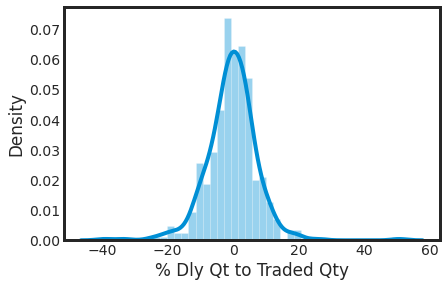

In [79]:
sns.distplot(y_test-y_predict)
plt.show()

In [80]:
model = ExtraTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.49362168234979964

In [81]:
y_test

681     37.32
723     40.58
474     55.24
1155    27.81
955     39.91
        ...  
275     82.70
1264    38.15
489     58.57
297     59.91
388     40.16
Name: % Dly Qt to Traded Qty, Length: 398, dtype: float64

In [82]:
y_predict

array([25.95, 39.01, 59.  , 32.52, 41.22, 56.05, 21.15, 41.45, 22.72,
       55.25, 25.95, 45.99, 67.73, 55.93, 40.69, 40.21, 53.11, 26.42,
       57.  , 38.5 , 43.31, 44.93, 69.16, 49.78, 30.08, 48.28, 43.31,
       42.67, 43.12, 58.36, 49.33, 30.1 , 69.81, 46.78, 47.51, 32.71,
       37.69, 43.43, 56.23, 60.26, 53.31, 81.97, 55.64, 49.35, 49.56,
       48.24, 34.19, 26.2 , 71.48, 40.54, 49.15, 27.15, 49.78, 47.61,
       27.97, 50.45, 34.64, 38.78, 45.76, 34.94, 25.95, 71.48, 54.43,
       72.13, 59.65, 49.35, 59.65, 74.96, 57.17, 57.38, 61.86, 41.61,
       67.07, 21.62, 48.46, 51.61, 18.9 , 40.54, 45.76, 40.69, 34.64,
       39.04, 49.1 , 53.72, 46.14, 53.82, 46.14, 66.48, 24.6 , 34.19,
       65.11, 19.14, 54.24, 47.18, 56.53, 58.35, 58.23, 50.57, 54.91,
       68.91, 56.3 , 37.01, 32.26, 38.19, 25.95, 60.68, 48.52, 66.91,
       42.55, 50.89, 44.46, 48.1 , 31.36, 45.95, 52.97, 47.85, 35.62,
       40.69, 51.  , 60.55, 40.71, 50.47, 51.15, 61.96, 33.04, 56.3 ,
       38.78, 51.23,

In [83]:
pd.crosstab(y_test,y_predict)

col_0                   14.79  18.16  18.90  19.14  19.33  21.15  21.62  \
% Dly Qt to Traded Qty                                                    
11.48                       0      0      0      0      0      0      0   
12.91                       0      0      0      0      0      1      0   
15.08                       0      0      0      0      0      0      0   
16.74                       0      0      0      0      0      0      0   
17.60                       0      0      1      0      0      0      0   
...                       ...    ...    ...    ...    ...    ...    ...   
74.43                       0      0      0      0      0      0      0   
76.87                       0      0      0      0      0      0      0   
80.24                       0      0      0      0      0      0      0   
82.70                       0      0      0      0      0      0      0   
100.00                      0      0      0      0      0      0      0   

col_0                   22.51  22.72  22.92  ...  69.81  71.48  72.13  72.66  \
% Dly Qt to Traded Qty                       ...                               
11.48                       0      0      0  ...      0      0      0      0   
12.91                       0      0      0  ...      0      0      0      0   
15.08                       0      0      0  ...      0      0      0      0   
16.74                       0      0      0  ...      0      0      0      0   
17.60                       0      0      0  ...      0      0      0      0   
...                       ...    ...    ...  ...    ...    ...    ...    ...   
74.43                       0      0      0  ...      0      0      0      0   
76.87                       0      0      0  ...      0      0      0      0   
80.24                       0      0      0  ...      0      0      0      0   
82.70                       0      0      0  ...      0      0      0      0   
100.00                      0      0      0  ...      0      0      0      0   

col_0                   74.68  74.96  76.20  76.42  78.97  81.97  
% Dly Qt to Traded Qty                                            
11.48                       0      0      0      0      0      0  
12.91                       0      0      0      0      0      0  
15.08                       0      0      0      0      0      0  
16.74                       0      0      0      0      0      0  
17.60                       0      0      0      0      0      0  
...                       ...    ...    ...    ...    ...    ...  
74.43                       0      0      1      0      0      0  
76.87                       0      0      0      0      0      0  
80.24                       0      0      0      0      0      0  
82.70                       0      0      0      0      0      0  
100.00                      0      0      0      0      0      0  

[384 rows x 277 columns]

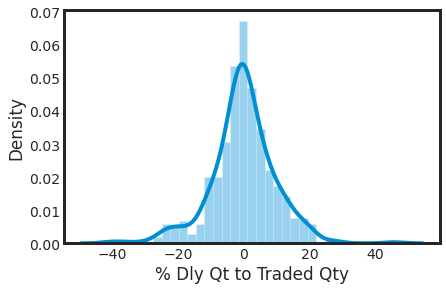

In [84]:
sns.distplot(y_test-y_predict)
plt.show()

In [85]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.8515494286174635

In [86]:
y_test

681     37.32
723     40.58
474     55.24
1155    27.81
955     39.91
        ...  
275     82.70
1264    38.15
489     58.57
297     59.91
388     40.16
Name: % Dly Qt to Traded Qty, Length: 398, dtype: float64

In [87]:
y_predict

array([35.8812, 37.529 , 54.5608, 30.1755, 43.2604, 52.0572, 20.4577,
       48.8983, 21.2913, 59.1822, 42.7246, 41.3479, 52.3792, 27.0844,
       44.0408, 54.1051, 53.6093, 46.6033, 53.1925, 34.56  , 29.6383,
       46.6784, 54.7945, 48.0936, 38.1452, 51.5457, 49.2259, 38.7412,
       42.0387, 57.3403, 51.9322, 30.5305, 59.2518, 30.6418, 50.217 ,
       46.1034, 44.8644, 39.5664, 47.7419, 59.7201, 58.3316, 64.2105,
       54.9335, 61.013 , 46.3447, 48.9156, 45.3981, 25.4787, 50.0851,
       40.8338, 33.4682, 26.7386, 48.1614, 37.0984, 30.7426, 52.5624,
       40.3604, 38.1358, 41.0087, 36.0607, 36.4072, 56.8362, 60.8655,
       55.04  , 58.8459, 54.0859, 61.9482, 63.4768, 53.1284, 63.4206,
       57.6537, 40.3484, 61.2263, 22.0877, 46.014 , 50.5889, 22.9832,
       42.2632, 37.2923, 46.0429, 41.5765, 46.5987, 52.2501, 56.577 ,
       45.747 , 49.9223, 45.0777, 52.501 , 22.4995, 43.1814, 56.2843,
       27.8058, 44.3227, 53.0329, 57.3428, 58.2015, 56.4021, 55.9485,
       57.1396, 64.5

In [88]:
pd.crosstab(y_test,y_predict)

col_0                   17.6800  20.4577  21.2913  21.9935  22.0877  22.3662  \
% Dly Qt to Traded Qty                                                         
11.48                         1        0        0        0        0        0   
12.91                         0        1        0        0        0        0   
15.08                         0        0        0        0        0        0   
16.74                         0        0        0        0        0        0   
17.60                         0        0        0        0        0        0   
...                         ...      ...      ...      ...      ...      ...   
74.43                         0        0        0        0        0        0   
76.87                         0        0        0        0        0        0   
80.24                         0        0        0        0        0        0   
82.70                         0        0        0        0        0        0   
100.00                        0        0        0        0        0        0   

col_0                   22.4850  22.4995  22.8588  22.9832  ...  64.3952  \
% Dly Qt to Traded Qty                                      ...            
11.48                         0        0        0        0  ...        0   
12.91                         0        0        0        0  ...        0   
15.08                         0        0        0        0  ...        0   
16.74                         0        0        0        0  ...        0   
17.60                         0        0        0        1  ...        0   
...                         ...      ...      ...      ...  ...      ...   
74.43                         0        0        0        0  ...        0   
76.87                         0        0        0        0  ...        0   
80.24                         0        0        0        0  ...        0   
82.70                         0        0        0        0  ...        0   
100.00                        0        0        0        0  ...        0   

col_0                   64.5181  64.6802  64.9243  65.4552  65.6063  66.8087  \
% Dly Qt to Traded Qty                                                         
11.48                         0        0        0        0        0        0   
12.91                         0        0        0        0        0        0   
15.08                         0        0        0        0        0        0   
16.74                         0        0        0        0        0        0   
17.60                         0        0        0        0        0        0   
...                         ...      ...      ...      ...      ...      ...   
74.43                         0        0        0        0        0        0   
76.87                         0        0        0        1        0        0   
80.24                         0        1        0        0        0        0   
82.70                         0        0        0        0        0        0   
100.00                        0        0        0        0        0        0   

col_0                   67.4149  70.0324  70.7361  
% Dly Qt to Traded Qty                             
11.48                         0        0        0  
12.91                         0        0        0  
15.08                         0        0        0  
16.74                         0        0        0  
17.60                         0        0        0  
...                         ...      ...      ...  
74.43                         0        1        0  
76.87                         0        0        0  
80.24                         0        0        0  
82.70                         0        0        1  
100.00                        0        0        0  

[384 rows x 398 columns]

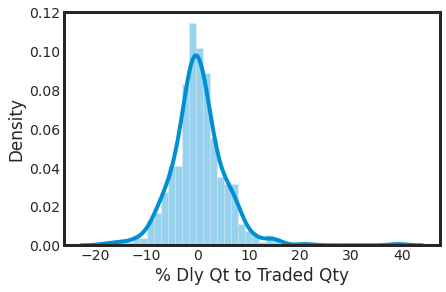

In [89]:
sns.distplot(y_test-y_predict)
plt.show()

In [90]:
model = MLPRegressor(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

-304080379.60677624

In [91]:
y_test

681     37.32
723     40.58
474     55.24
1155    27.81
955     39.91
        ...  
275     82.70
1264    38.15
489     58.57
297     59.91
388     40.16
Name: % Dly Qt to Traded Qty, Length: 398, dtype: float64

In [92]:
y_predict

array([ 6.36896380e+03, -1.93549454e+04, -7.64060108e+04,  4.81259272e+05,
        2.30753506e+04, -9.65159345e+04,  1.07802099e+06, -2.93907814e+05,
        4.03580337e+05, -5.73998385e+04, -1.55062860e+04,  2.87972360e+04,
       -1.10355302e+05,  2.70374804e+05, -2.76113004e+04, -9.99073323e+04,
       -2.27028177e+04, -6.35223532e+04, -4.87302863e+04,  2.80789469e+05,
        1.37822438e+05, -3.33709299e+04, -3.64454132e+04, -1.00587775e+05,
        2.41216081e+04, -3.16520383e+04, -6.42503941e+03,  6.54685812e+03,
        4.55747760e+04, -7.97038194e+04, -5.81055749e+04,  8.73608545e+04,
       -5.66051908e+04,  4.06157043e+05, -8.96895946e+04, -6.25228413e+04,
       -7.04491077e+03,  6.74237847e+04,  1.03030428e+04, -6.93610572e+04,
       -8.58703644e+04, -1.21788406e+05, -1.01385590e+05, -1.18139825e+05,
       -5.51580231e+04, -5.90202433e+04, -4.30033421e+03,  4.72948936e+05,
       -3.71326463e+04,  1.83733961e+04,  2.56109858e+04,  3.74843869e+05,
       -3.21686441e+05, -

In [93]:
pd.crosstab(y_test,y_predict)

col_0                   -4.349826e+05  -4.038060e+05  -3.981447e+05  \
% Dly Qt to Traded Qty                                                
11.48                               0              0              0   
12.91                               0              0              0   
15.08                               0              0              0   
16.74                               0              0              0   
17.60                               0              0              0   
...                               ...            ...            ...   
74.43                               0              0              0   
76.87                               0              0              0   
80.24                               0              0              0   
82.70                               0              0              0   
100.00                              0              0              0   

col_0                   -3.564194e+05  -3.216864e+05  -2.939078e+05  \
% Dly Qt to Traded Qty                                                
11.48                               0              0              0   
12.91                               0              0              0   
15.08                               0              0              0   
16.74                               0              0              0   
17.60                               0              0              0   
...                               ...            ...            ...   
74.43                               0              0              0   
76.87                               0              0              0   
80.24                               0              0              0   
82.70                               0              0              0   
100.00                              0              0              0   

col_0                   -2.819655e+05  -2.772839e+05  -2.739492e+05  \
% Dly Qt to Traded Qty                                                
11.48                               0              0              0   
12.91                               0              0              0   
15.08                               0              0              0   
16.74                               0              0              0   
17.60                               0              0              0   
...                               ...            ...            ...   
74.43                               0              0              0   
76.87                               0              0              0   
80.24                               0              0              0   
82.70                               0              0              0   
100.00                              0              0              0   

col_0                   -2.580345e+05  ...   6.371620e+05   6.748327e+05  \
% Dly Qt to Traded Qty                 ...                                 
11.48                               0  ...              0              0   
12.91                               0  ...              0              0   
15.08                               0  ...              0              1   
16.74                               0  ...              0              0   
17.60                               0  ...              0              0   
...                               ...  ...            ...            ...   
74.43                               0  ...              0              0   
76.87                               0  ...              0              0   
80.24                               0  ...              0              0   
82.70                               0  ...              0              0   
100.00                              0  ...              0              0   

col_0                    8.274848e+05   8.384452e+05   9.748339e+05  \
% Dly Qt to Traded Qty                                                
11.48                               0              0              0   
12.91                     

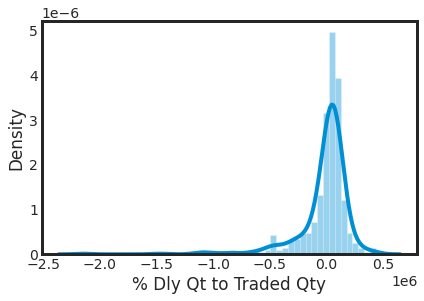

In [94]:
sns.distplot(y_test-y_predict)
plt.show()

In [95]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([43.358, 44.504, 60.488, 34.504, 44.146, 42.174, 27.788, 38.326,
       40.56 , 47.982, 45.156, 41.544, 50.788, 40.56 , 50.382, 55.442,
       48.544, 43.352, 56.996, 36.972, 47.952, 64.142, 52.418, 38.486,
       43.44 , 42.412, 46.542, 37.74 , 47.242, 57.398, 38.718, 36.588,
       57.674, 37.086, 58.466, 54.76 , 43.44 , 40.924, 45.104, 54.732,
       46.03 , 54.97 , 45.064, 54.668, 54.32 , 64.754, 44.516, 27.342,
       36.628, 42.696, 53.92 , 40.474, 45.144, 30.478, 46.146, 50.19 ,
       43.814, 52.638, 37.202, 52.768, 42.696, 41.804, 53.568, 48.782,
       47.582, 47.922, 49.638, 69.17 , 26.096, 60.488, 51.136, 40.356,
       52.108, 35.764, 36.278, 42.542, 29.444, 45.53 , 41.39 , 36.822,
       38.024, 55.092, 47.106, 36.056, 49.958, 46.798, 56.336, 54.462,
       30.578, 51.858, 44.298, 40.11 , 41.208, 42.652, 37.808, 48.31 ,
       56.634, 57.264, 40.582, 47.922, 54.32 , 66.854, 27.438, 45.38 ,
       44.53 , 43.244, 58.37 , 52.768, 39.476, 54.76 , 42.112, 40.77 ,
      

In [96]:
pd.crosstab(y_test,y_predict)

col_0                   19.558  20.590  25.214  25.490  25.798  26.096  \
% Dly Qt to Traded Qty                                                   
11.48                        0       0       0       1       0       0   
12.91                        0       0       0       0       0       0   
15.08                        0       0       0       0       0       0   
16.74                        1       0       0       0       0       0   
17.60                        0       0       0       0       0       0   
...                        ...     ...     ...     ...     ...     ...   
74.43                        0       0       0       0       0       0   
76.87                        0       0       0       0       0       0   
80.24                        0       0       0       0       0       0   
82.70                        0       0       0       0       0       0   
100.00                       0       0       0       0       0       0   

col_0                   27.246  27.334  27.342  27.438  ...  58.466  59.892  \
% Dly Qt to Traded Qty                                  ...                   
11.48                        0       0       0       0  ...       0       0   
12.91                        0       0       0       0  ...       0       0   
15.08                        0       0       0       0  ...       0       0   
16.74                        0       0       0       0  ...       0       0   
17.60                        0       0       0       0  ...       0       0   
...                        ...     ...     ...     ...  ...     ...     ...   
74.43                        0       0       0       0  ...       0       0   
76.87                        0       0       0       0  ...       0       0   
80.24                        0       0       0       0  ...       0       0   
82.70                        0       0       0       0  ...       0       0   
100.00                       0       0       0       0  ...       0       0   

col_0                   60.488  61.234  62.154  64.142  64.614  64.754  \
% Dly Qt to Traded Qty                                                   
11.48                        0       0       0       0       0       0   
12.91                        0       0       0       0       0       0   
15.08                        0       0       0       0       0       0   
16.74                        0       0       0       0       0       0   
17.60                        0       0       0       0       0       0   
...                        ...     ...     ...     ...     ...     ...   
74.43                        0       0       0       0       0       0   
76.87                        0       0       0       0       0       0   
80.24                        0       0       0       0       0       0   
82.70                        0       0       0       0       0       0   
100.00                       0       0       0       0       0       0   

col_0                   66.854  69.170  
% Dly Qt to Traded Qty                  
11.48                        0       0  
12.91                        0       0  
15.08                        0       0  
16.74                        0       0  
17.60                        0       0  
...                        ...     ...  
74.43                        0       0  
76.87                        0       0  
80.24                        0       0  
82.70                        0       0  
100.00                       0       0  

[384 rows x 318 columns]

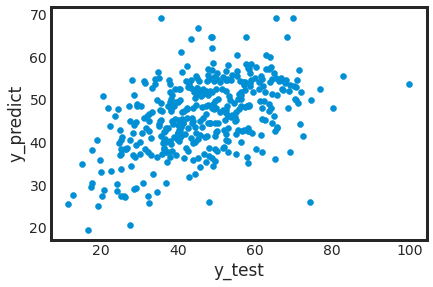

In [97]:
plt.scatter(y_test, y_predict)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [98]:

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


MAE: 9.544512562814072
MSE: 146.44042357788945
RMSE: 12.101257107337627


In [99]:
# RMSE/(max(DV)-min(DV))

12.101257107337627/(max(y)-min(y))

0.13670647432600122

In [100]:
metrics.r2_score(y_test, y_predict)

0.22184626774185456

In [105]:
# Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "Decision TreeRegressor": DecisionTreeRegressor(),
          "Extra TreesRegressor" : ExtraTreeRegressor(),
          "Random Forest Regressor": RandomForestRegressor(),
          "MPL": MLPRegressor()}
    
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [106]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.7569948223520148,
 'Decision TreeRegressor': 0.6577863280626441,
 'Extra TreesRegressor': 0.5510826750628193,
 'Random Forest Regressor': 0.8640904264061791,
 'MPL': -605317005.038543}

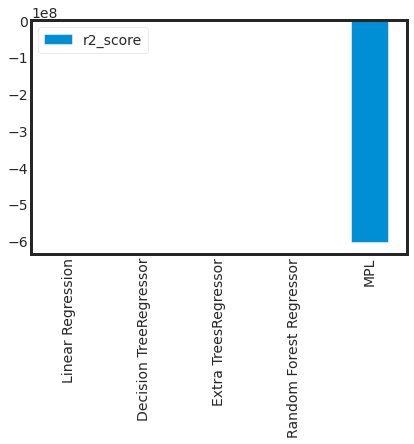

In [108]:
model_compare = pd.DataFrame(model_scores, index=["r2_score"])
model_compare.T.plot.bar();